In [25]:
import pandas as pd  
import numpy as np 
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
# Carrega o dataset
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
data = data.rename(columns={'family_history_with_overweight': 'FHWOW'})
data = data.rename(columns={'NObeyesdad': 'Obesity'})
# Verifica dados ausentes
missing_values = data.isnull().sum()
print(missing_values.to_frame().T)

   Gender  Age  Height  Weight  FHWOW  FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  \
0       0    0       0       0      0     0     0    0     0      0     0   

   SCC  FAF  TUE  CALC  MTRANS  Obesity  
0    0    0    0     0       0        0  


In [4]:
# imprime os dados
print(data.shape)
data.head(10)

(2111, 17)


,Gender,Age,Height,Weight,FHWOW,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


| **Feature Name**              | **Description**                                                                 |
|-------------------------------|---------------------------------------------------------------------------------|
| `FHWOW` | Has a family member suffered or suffers from overweight?                        |
| `FAVC`                        | Do you eat high caloric food frequently?                                        |
| `FCVC`                        | Do you usually eat vegetables in your meals?                                   |
| `NCP`                         | How many main meals do you have daily?                                         |
| `CAEC`                        | Do you eat any food between meals?                                             |
| `SMOKE`                       | Do you smoke?                                                                  |
| `CH2O`                        | How much water do you drink daily?                                             |
| `SCC`                         | Do you monitor the calories you eat daily?                                     |
| `FAF`                         | How often do you have physical activity?                                       |
| `TUE`                         | How much time do you use technological devices such as cell phone, videogames, television, computer, and others? |
| `CALC`                        | How often do you drink alcohol?                                                |
| `MTRANS`                      | Which transportation do you usually use?                                       |

In [5]:
# Separa as colunas categoricas e numericas
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(exclude=['object']).columns

In [6]:
# colunas categoricas
print(categorical_columns.values)

['Gender' 'FHWOW' 'FAVC' 'CAEC' 'SMOKE' 'SCC' 'CALC' 'MTRANS' 'Obesity']


In [7]:
# colunas numericas
print(numerical_columns.values)

['Age' 'Height' 'Weight' 'FCVC' 'NCP' 'CH2O' 'FAF' 'TUE']


In [8]:
# aplica o LabelEncoder nas colunas categoricas menos o target

categorical_columns = categorical_columns[categorical_columns != 'Obesity']

data[categorical_columns] = data[categorical_columns].apply(LabelEncoder().fit_transform)

data.head(10)

,Gender,Age,Height,Weight,FHWOW,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II
5,1,29.0,1.62,53.0,0,1,2.0,3.0,2,0,2.0,0,0.0,0.0,2,0,Normal_Weight
6,0,23.0,1.50,55.0,1,1,3.0,3.0,2,0,2.0,0,1.0,0.0,2,2,Normal_Weight
7,1,22.0,1.64,53.0,0,0,2.0,3.0,2,0,2.0,0,3.0,0.0,2,3,Normal_Weight
8,1,24.0,1.78,64.0,1,1,3.0,3.0,2,0,2.0,0,1.0,1.0,1,3,Normal_Weight
9,1,22.0,1.72,68.0,1,1,2.0,3.0,2,0,2.0,0,1.0,1.0,3,3,Normal_Weight


In [9]:
# Quantidade de instancias por classe target 
print(data['Obesity'].value_counts())

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [10]:
# Separa em fearures e target
X = data.drop('Obesity', axis=1)
y = data['Obesity']

from sklearn.model_selection import train_test_split

# Separa em features e target
X = data.drop('Obesity', axis=1)
y = data['Obesity']

# Separa TESTE (20%) e TREINO (80%) - que sera separado em treino e validacao dentro do cross-validation
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# MODELO KNN

In [11]:
modelKnn = KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights='distance')

# Aqui separa em treino e validacao para crossval
scores_knn = cross_val_score(modelKnn, X, y, cv=5)

print("Scores: ", scores_knn)
print("Média dos scores:", scores_knn.mean())

Scores:  [0.8816568  0.84911243 0.85502959 0.884273   0.87537092]
Média dos scores: 0.8690885466963989


In [12]:
# Modelo final usando toda a base de treino + validacao
modelKnn.fit(X, y)

KNeighborsClassifier(metric='euclidean', weights='distance')

In [13]:
# Predicao do modelo em validacao usando a base completa
predictionsKnn = modelKnn.predict(X)

print('Accuracy:', accuracy_score(y, predictionsKnn))
print('F1:', f1_score(y, predictionsKnn, average='macro'))
print('Precision:', precision_score(y, predictionsKnn, average='macro'))
print('Recall:', recall_score(y, predictionsKnn, average='macro'))


Accuracy: 1.0
F1: 1.0
Precision: 1.0
Recall: 1.0


In [14]:
# Predicao do modelo em teste
predictionsKnn = modelKnn.predict(X_test)

print('Accuracy:', accuracy_score(y_test, predictionsKnn))
print('F1:', f1_score(y_test, predictionsKnn, average='macro'))
print('Precision:', precision_score(y_test, predictionsKnn, average='macro'))
print('Recall:', recall_score(y_test, predictionsKnn, average='macro'))

Accuracy: 0.8865248226950354
F1: 0.8739308156513157
Precision: 0.8871655915657648
Recall: 0.8861879645329511


In [15]:
from sklearn.inspection import permutation_importance

# calcula a importancia das features do modelo
perm_importance_knn = permutation_importance(modelKnn, X_test, y_test, scoring='accuracy', random_state=42)

feature_names = X_test.columns

# ordena as features
for i in np.argsort(perm_importance_knn.importances_mean)[::-1]:
    print(f"Feature: {feature_names[i]}, Importance: {perm_importance_knn.importances_mean[i]:.4f}")

Feature: Weight, Importance: 0.7040
Feature: Age, Importance: 0.3083
Feature: MTRANS, Importance: 0.0435
Feature: FAF, Importance: 0.0213
Feature: NCP, Importance: 0.0189
Feature: CALC, Importance: 0.0113
Feature: Gender, Importance: 0.0109
Feature: FHWOW, Importance: 0.0099
Feature: CH2O, Importance: 0.0071
Feature: TUE, Importance: 0.0052
Feature: Height, Importance: 0.0024
Feature: SCC, Importance: 0.0024
Feature: FAVC, Importance: 0.0009
Feature: FCVC, Importance: 0.0005
Feature: SMOKE, Importance: 0.0000
Feature: CAEC, Importance: -0.0057


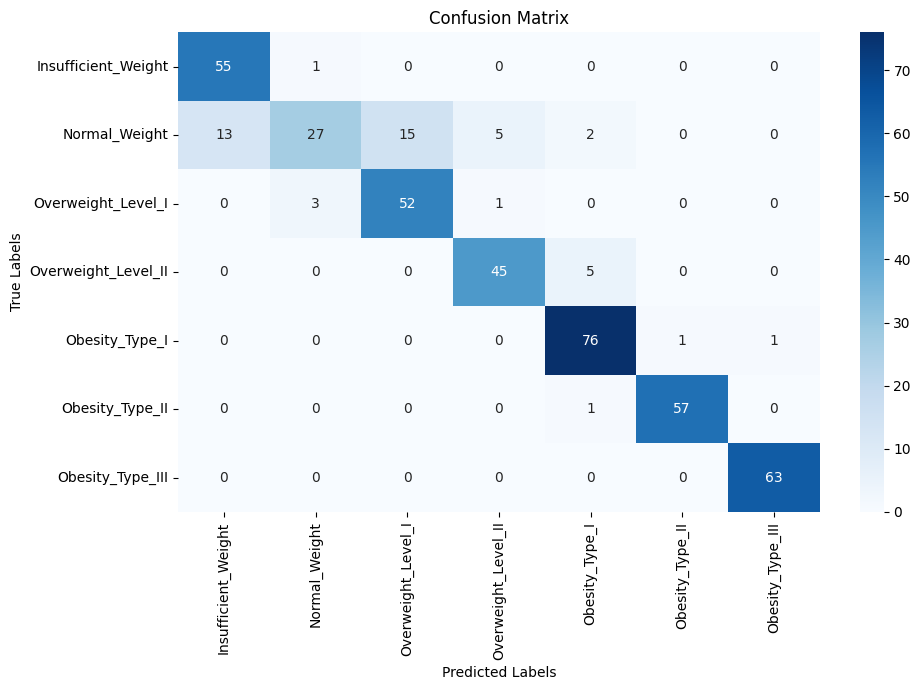

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# ordem das classes
class_labels = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

# computa a matriz
cm_knn = confusion_matrix(y_test, predictionsKnn, labels=class_labels)

# plot da matriz
plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()


In [26]:
import lime
import lime.lime_tabular
import warnings
from IPython.display import display, HTML

# ingora warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# cria o explainer 
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X.values,  
    feature_names=X.columns.tolist(),
    class_names=np.unique(y).astype(str),
    mode='classification'
)

# interpreta uma instancia
i = 0
exp = explainer.explain_instance(
    data_row=X_test.iloc[i].values,  
    predict_fn=lambda x: modelKnn.predict_proba(x),
    num_features=5,
    top_labels=1,
)

# imprime a interpretacao do modelo
print(f'Previsão do modelo: {modelKnn.predict(X_test.iloc[[i]])[0]}')

# fundo branco 
html_content = exp.as_html()
html_content = f"""
<div style="background-color:white">
{html_content}
</div>
"""
display(HTML(html_content))

Previsão do modelo: Insufficient_Weight


## Treinamento do Modelo Naive Bayes

Nesta etapa, vamos treinar o modelo de Naive Bayes (especificamente, o **GaussianNB**) com os mesmos dados pré-processados, seguindo o mesmo fluxo utilizado anteriormente para o modelo KNN.


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Criação do modelo Naive Bayes
modelNb = GaussianNB()

# Avaliação com validação cruzada
scores_nb = cross_val_score(modelNb, X, y, cv=5)

print("Scores Naive Bayes: ", scores_nb)
print("Média dos scores:", scores_nb.mean())


Scores Naive Bayes:  [0.60059172 0.6183432  0.5887574  0.55489614 0.59050445]
Média dos scores: 0.5906185802328234


## Treinamento Final com Naive Bayes

Após a validação cruzada, treinamos o modelo final com todo o conjunto de treino (treino + validação) e fazemos as previsões.


In [ ]:
# Treinamento do modelo final
modelNb.fit(X, y)

# Predição no conjunto de treino + validação
predictionsNb = modelNb.predict(X)

# Avaliação
print('Accuracy:', accuracy_score(y, predictionsNb))
print('F1:', f1_score(y, predictionsNb, average='macro'))
print('Precision:', precision_score(y, predictionsNb, average='macro'))
print('Recall:', recall_score(y, predictionsNb, average='macro'))


Accuracy: 0.6196682464454977
F1: 0.5952279842934479
Precision: 0.6560032370033733
Recall: 0.6140802418075849


## Avaliação do Modelo Naive Bayes no Conjunto de Teste

Agora avaliamos o desempenho do modelo Naive Bayes no conjunto de teste separado anteriormente (20% dos dados).


In [ ]:
# Predição no conjunto de teste
predictionsNb = modelNb.predict(X_test)

# Avaliação
print('Accuracy:', accuracy_score(y_test, predictionsNb))
print('F1:', f1_score(y_test, predictionsNb, average='macro'))
print('Precision:', precision_score(y_test, predictionsNb, average='macro'))
print('Recall:', recall_score(y_test, predictionsNb, average='macro'))


Accuracy: 0.640661938534279
F1: 0.6168385018543235
Precision: 0.6483100321534375
Recall: 0.632544876596998


In [ ]:
# calcula a importancia das features do modelo
perm_importance_nb = permutation_importance(modelNb, X_test, y_test, scoring='accuracy', random_state=42)

feature_names = X_test.columns

# ordena as features
for i in np.argsort(perm_importance_nb.importances_mean)[::-1]:
    print(f"Feature: {feature_names[i]}, Importance: {perm_importance_nb.importances_mean[i]:.4f}")

Feature: Weight, Importance: 0.2047
Feature: FCVC, Importance: 0.1187
Feature: Gender, Importance: 0.1116
Feature: FAVC, Importance: 0.0837
Feature: FHWOW, Importance: 0.0823
Feature: NCP, Importance: 0.0723
Feature: CALC, Importance: 0.0619
Feature: Age, Importance: 0.0355
Feature: CAEC, Importance: 0.0350
Feature: MTRANS, Importance: 0.0288
Feature: SCC, Importance: 0.0213
Feature: FAF, Importance: 0.0199
Feature: CH2O, Importance: 0.0123
Feature: TUE, Importance: 0.0085
Feature: SMOKE, Importance: 0.0066
Feature: Height, Importance: -0.0066


## Matriz de Confusão - Naive Bayes

A matriz de confusão nos ajuda a visualizar o desempenho do modelo em termos de acertos e erros para cada classe.


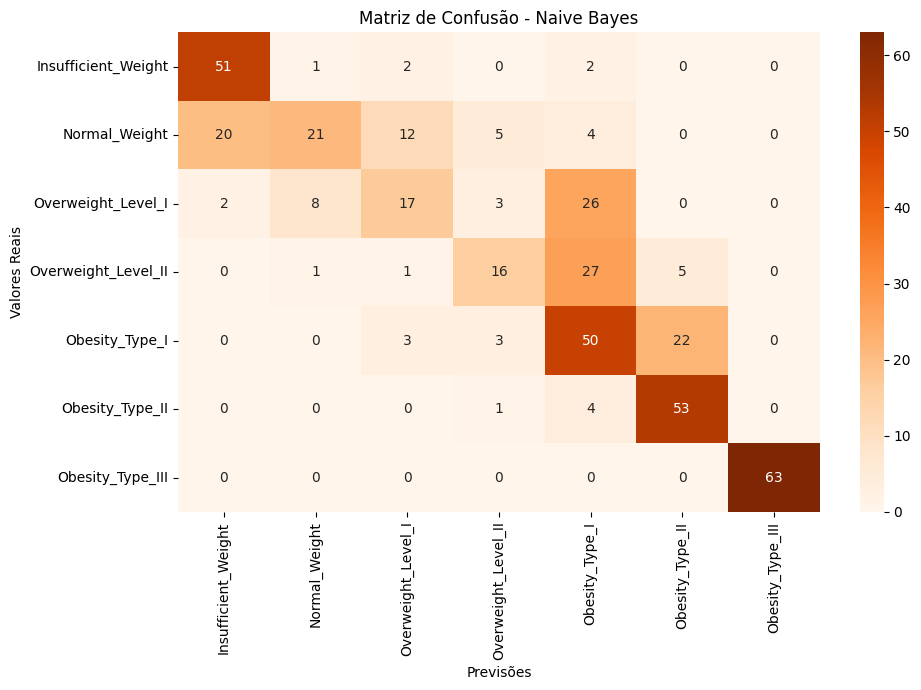

In [ ]:
# Matriz de confusão
cm_nb = confusion_matrix(y_test, predictionsNb, labels=class_labels)

# Plot da matriz
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusão - Naive Bayes')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.tight_layout()
plt.show()


## Interpretabilidade com Probabilidades Condicionais - Naive Bayes

Para compreender as decisões do modelo, utilizamos a utilizamos a visualização em grádicos das probabilidades condicionais geradas.


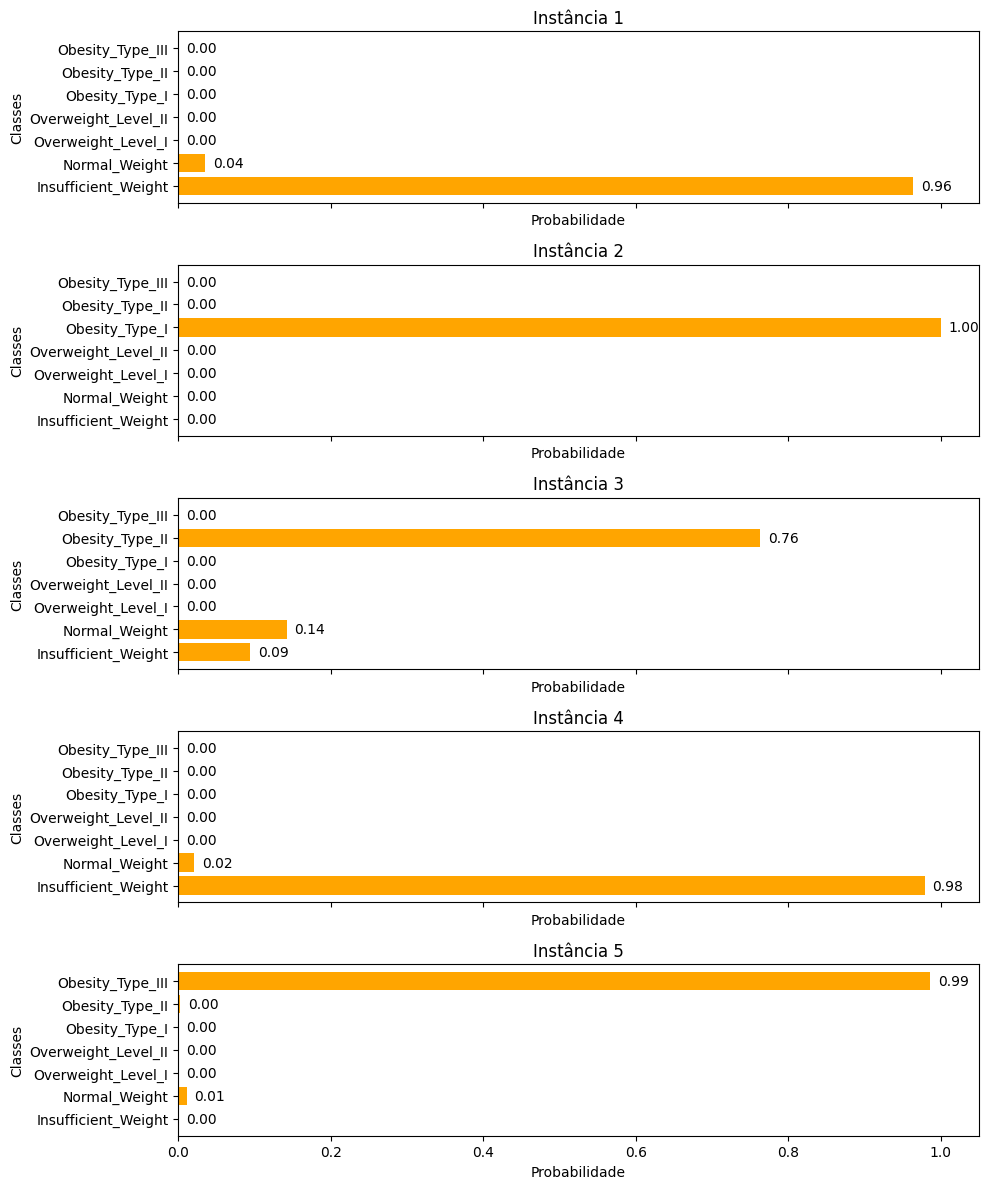

In [ ]:
# Calcula as probabilidades condicionais para o conjunto de teste
probabilities_nb = modelNb.predict_proba(X_test)

fig, axes = plt.subplots(5, 1, figsize=(10, 12), sharex=True)
for i, (probs, ax) in enumerate(zip(probabilities_nb[:5], axes)):
    ax.barh(class_labels, probs, color='orange')
    ax.set_title(f"Instância {i + 1}")
    ax.set_ylabel("Classes")
    ax.set_xlabel("Probabilidade")
    for j, v in enumerate(probs):
        ax.text(v + 0.01, j, f"{v:.2f}", va='center')

plt.tight_layout()
plt.show()

## **ÁRVORE DE DECISÃO**

In [18]:
# Criação do modelo de árvore de decisão
modelTree = DecisionTreeClassifier(random_state=42)

# Aqui separa em treino e validação para cross-validation
scores = cross_val_score(modelTree, X, y, cv=5)

print("Scores: ", scores)
print("Média dos scores:", scores.mean())

Scores:  [0.92011834 0.91715976 0.92011834 0.92878338 0.92878338]
Média dos scores: 0.9229926430565556


In [32]:
# Modelo final usando toda a base de treino + validação
modelTree.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [33]:
# Predição do modelo em validação usando a base completa
predictionsTree = modelTree.predict(X)

print('Accuracy:', accuracy_score(y, predictionsTree))
print('F1:', f1_score(y, predictionsTree, average='macro'))
print('Precision:', precision_score(y, predictionsTree, average='macro'))
print('Recall:', recall_score(y, predictionsTree, average='macro'))

Accuracy: 1.0
F1: 1.0
Precision: 1.0
Recall: 1.0


In [34]:
# Predição do modelo em teste
predictionsTree = modelTree.predict(X_test)

print('Accuracy:', accuracy_score(y_test, predictionsTree))
print('F1:', f1_score(y_test, predictionsTree, average='macro'))
print('Precision:', precision_score(y_test, predictionsTree, average='macro'))
print('Recall:', recall_score(y_test, predictionsTree, average='macro'))

Accuracy: 0.933806146572104
F1: 0.9338049593559653
Precision: 0.933526786680644
Recall: 0.9345151773381553


In [27]:
from sklearn.inspection import permutation_importance

# calcula a importancia das features do modelo
perm_importance_decision_tree = permutation_importance(modelTree, X_test, y_test, scoring='accuracy', random_state=42)

feature_names = X_test.columns

# ordena as features
for i in np.argsort(perm_importance_decision_tree.importances_mean)[::-1]:
    print(f"Feature: {feature_names[i]}, Importance: {perm_importance_decision_tree.importances_mean[i]:.4f}")

Feature: Weight, Importance: 0.7262
Feature: Height, Importance: 0.2875
Feature: Gender, Importance: 0.1589
Feature: Age, Importance: 0.0534
Feature: CALC, Importance: 0.0265
Feature: FAVC, Importance: 0.0165
Feature: FCVC, Importance: 0.0137
Feature: CAEC, Importance: 0.0113
Feature: CH2O, Importance: 0.0095
Feature: FAF, Importance: 0.0080
Feature: SMOKE, Importance: 0.0005
Feature: MTRANS, Importance: 0.0000
Feature: FHWOW, Importance: 0.0000
Feature: SCC, Importance: 0.0000
Feature: NCP, Importance: -0.0009
Feature: TUE, Importance: -0.0014


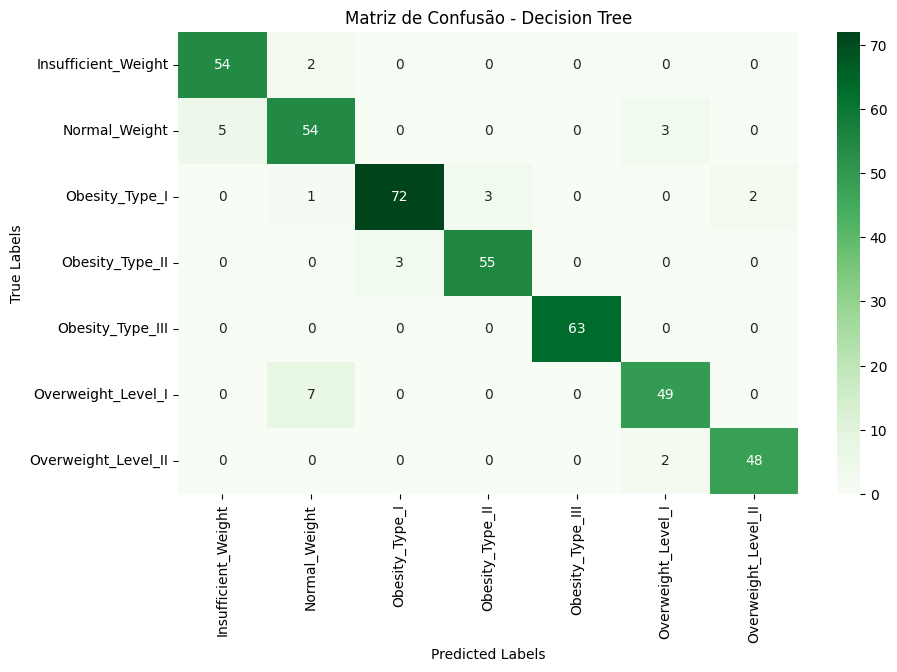

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Faz a matriz de confusão
cmArvoreDecisao = confusion_matrix(y_test, predictionsTree)

class_labels = sorted(set(y_test))  

# Plot da matriz de confusão
plt.figure(figsize=(10, 6))
sns.heatmap(cmArvoreDecisao, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusão - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

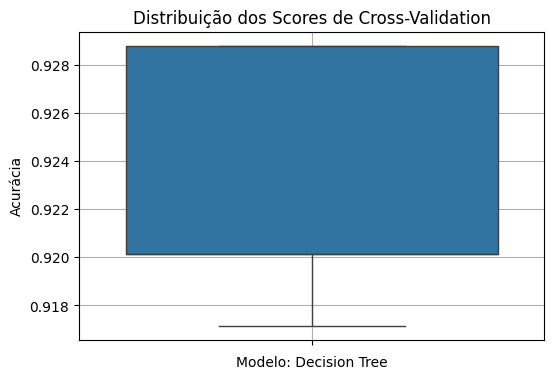

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(data=scores)
plt.title("Distribuição dos Scores de Cross-Validation")
plt.ylabel("Acurácia")
plt.xlabel("Modelo: Decision Tree")
plt.grid(True)
plt.show()


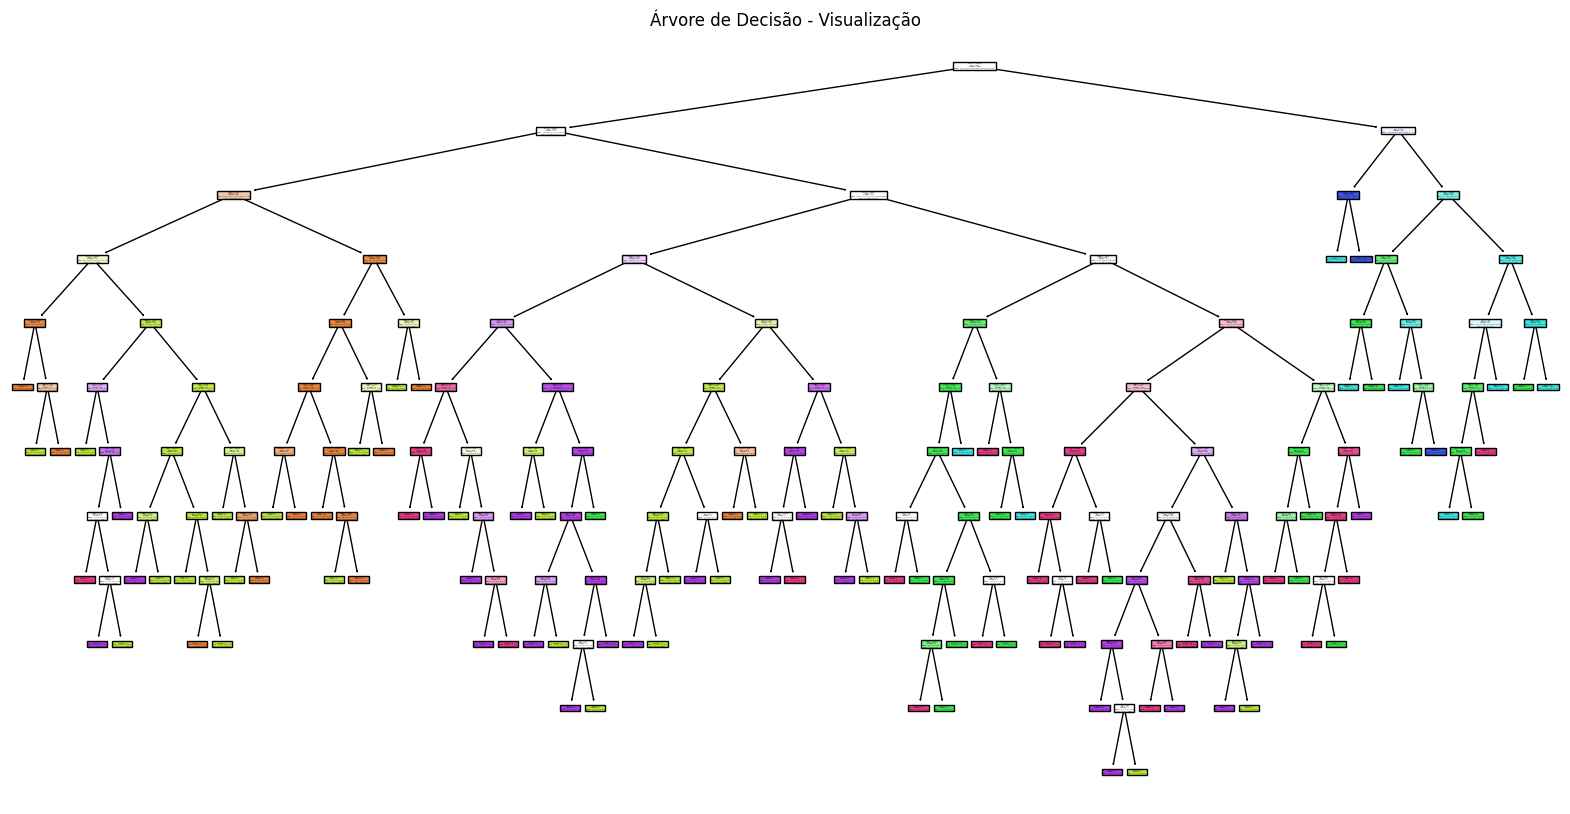

In [45]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(modelTree, feature_names=X.columns, class_names=np.unique(y).astype(str), filled=True)
plt.title("Árvore de Decisão - Visualização")
plt.show()


                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.96      0.94        56
      Normal_Weight       0.84      0.87      0.86        62
     Obesity_Type_I       0.96      0.92      0.94        78
    Obesity_Type_II       0.95      0.95      0.95        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.91      0.88      0.89        56
Overweight_Level_II       0.96      0.96      0.96        50

           accuracy                           0.93       423
          macro avg       0.93      0.93      0.93       423
       weighted avg       0.93      0.93      0.93       423



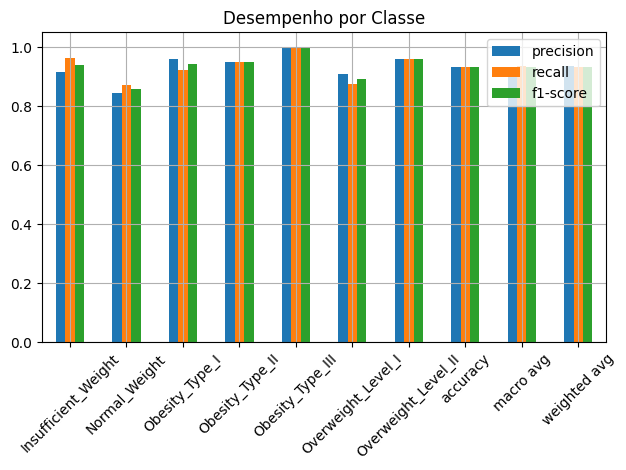

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictionsTree))

report = classification_report(y_test, predictionsTree, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title("Desempenho por Classe")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
